# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
medical = pd.read_csv('../kiersten/data/Medical_Examiner_Case_Archive.csv', low_memory=False)

In [3]:
medical.head(3)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Cold Related,Heat Related,Commissioner District,Incident Address,Incident City,Incident Zip Code,longitude,latitude,location,Residence City,Residence Zip,OBJECTID,Chicago Ward,Chicago Community Area,COVID Related
0,ME2023-06354,10/26/2023 02:34:00 AM,10/26/2023 02:01:00 AM,NaN,Male,Black,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2.0,512 W LAKE ST,CHICAGO,60661,-87.640339,41.885803,"(41.8858033, -87.64033894)",NaN,NaN,78295,34.0,NEAR WEST SIDE,False
1,ME2023-06353,10/25/2023 10:08:00 PM,10/25/2023 09:42:00 PM,20.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,5.0,West 162nd Street and Vincennes Road,NaN,NaN,-87.628879,41.600921,"(41.60092087, -87.62887866)",Glenwood,60425,78291,NaN,NaN,False
2,ME2023-06352,10/25/2023 09:28:00 PM,10/25/2023 09:04:00 PM,67.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,16.0,3532 S 58th Ct,CICERO,60804,-87.769649,41.827775,"(41.82777541, -87.76964878)",Cicero,60804,78290,NaN,NaN,False


In [4]:
medical.shape

(78221, 30)

In [5]:
medical.isna().sum()

Case Number                   0
Date of Incident           1833
Date of Death                69
Age                         404
Gender                      272
Race                        417
Latino                        0
Manner of Death             477
Primary Cause               811
Primary Cause Line A        811
Primary Cause Line B      53742
Primary Cause Line C      74900
Secondary Cause           48144
Gun Related                1236
Opioid Related             1236
Cold Related                  0
Heat Related                  0
Commissioner District      9959
Incident Address           1045
Incident City              1751
Incident Zip Code          1849
longitude                  9957
latitude                   9957
location                   9957
Residence City             2164
Residence Zip              2032
OBJECTID                      0
Chicago Ward              34739
Chicago Community Area    34732
COVID Related               759
dtype: int64

In [6]:
medical.Race.value_counts()

White         42288
Black         32364
Asian          1807
Other           977
Unknown         299
Am. Indian       69
Name: Race, dtype: int64

In [7]:
medical['Manner of Death'].value_counts()

NATURAL         38489
ACCIDENT        25008
HOMICIDE         7749
SUICIDE          4401
UNDETERMINED     1338
PENDING           759
Name: Manner of Death, dtype: int64

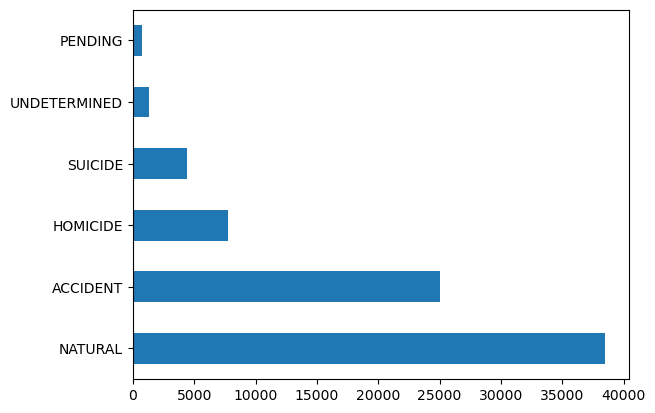

In [8]:
medical['Manner of Death'].value_counts().plot(kind = 'barh');

In [9]:
medical['Primary Cause'].value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                                                                                    7769
PNEUMONIA. NOVEL CORONA (COVID-19) VIRAL INFECTION                                                                                4097
MULTIPLE GUNSHOT WOUNDS                                                                                                           3947
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                                               3124
NOVEL CORONA (COVID-19) VIRAL INFECTION                                                                                           2543
                                                                                                                                  ... 
COMBINED 3,4-METHYLENEDIOXYMETHAMPHETAMINE (MDMA) AND TADALAFIL TOXICITY                                                             1
INHALATION AND THERMAL INJURIES . INHALATION OF SMOKE A

In [10]:
medical['Secondary Cause'].value_counts()

DIABETES MELLITUS                                                                            1886
OBESITY                                                                                      1662
HYPERTENSION                                                                                 1141
CHRONIC ETHANOLISM                                                                            875
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                           711
                                                                                             ... 
PNEUMONIA DUE TO NOVEL CORONA (COVID-19) VIRAL INFECTION; DIABETES MELLITUS; HYPERTENSION       1
RIGHT FEMUR FRACTURE, CHRONIC LYMPHOID LEUKEMIA                                                 1
FRACTURE OF LEFT FEMUR DUE TO PROBABLE FALL                                                     1
DIABETES MELLITUS; HYPERTENSION;  DEMENTIA                                                      1
METASTATIC PANCREATI

In [11]:
medical['Heat Related'].value_counts(normalize=True)

False    0.999501
True     0.000499
Name: Heat Related, dtype: float64

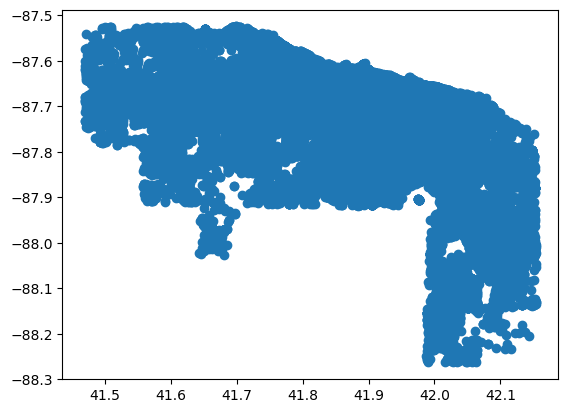

In [12]:
plt.scatter(medical['latitude'], medical['longitude']);

In [13]:
manner = medical[['Manner of Death', 'latitude', 'longitude']]
manner.head()

,Manner of Death,latitude,longitude
0,NaN,41.885803,-87.640339
1,NaN,41.600921,-87.628879
2,NaN,41.827775,-87.769649
3,NaN,41.912988,-87.804452
4,NaN,41.758760,-87.831108


In [14]:
manner['Manner'] = manner['Manner of Death'].map({
    'NATURAL':0,
    'ACCIDENT':1,
    'HOMICIDE':2,
    'SUICIDE':3,
    'UNDETERMINED':4,
    'PENDING':5
})

manner.head()

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_18725/260177297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manner['Manner'] = manner['Manner of Death'].map({


,Manner of Death,latitude,longitude,Manner
0,NaN,41.885803,-87.640339,NaN
1,NaN,41.600921,-87.628879,NaN
2,NaN,41.827775,-87.769649,NaN
3,NaN,41.912988,-87.804452,NaN
4,NaN,41.758760,-87.831108,NaN


In [15]:
manner['Manner'].value_counts()

0.0    38489
1.0    25008
2.0     7749
3.0     4401
4.0     1338
5.0      759
Name: Manner, dtype: int64

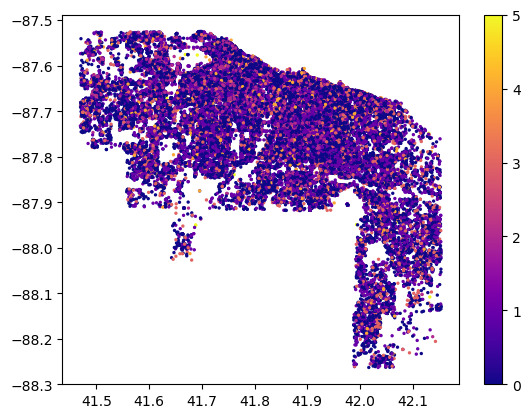

In [16]:
plt.scatter(manner['latitude'], manner['longitude'], s=2, c=manner['Manner'], cmap='plasma')
plt.colorbar();

# Semi-cleaned Data EDA:

In [19]:
semi_clean = pd.read_csv('../kiersten/data/dataframe.csv')
semi_clean.head()

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related
0,20,10/24/2023 12:43:00 AM,10/25/2023 12:11:00 AM,22.0,Female,Black,False,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,NaN,NaN,False,False,False,False,1.0,CHICAGO,60644.0,-87.754890,41.872093,Indianapolis,46224.0,AUSTIN,False
1,22,10/24/2023 10:30:00 PM,10/24/2023 09:51:00 PM,35.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,4.0,CHICAGO,60649.0,-87.558292,41.759939,Chicago,60633.0,SOUTH SHORE,False
2,23,10/24/2023 09:18:00 PM,10/24/2023 08:36:00 PM,54.0,Male,White,False,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,NaN,NaN,NaN,True,False,False,False,12.0,CHICAGO,60634.0,-87.780811,41.955351,Chicago,60634.0,PORTAGE PARK,False
3,30,10/24/2023 07:48:00 AM,10/24/2023 07:16:00 AM,19.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,3.0,CHICAGO,60649.0,-87.584359,41.771935,NaN,NaN,SOUTH SHORE,False
4,35,10/23/2023 10:21:00 PM,10/23/2023 09:29:00 PM,41.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,2.0,CHICAGO,60636.0,-87.663792,41.782286,Chicago,60636.0,WEST ENGLEWOOD,False


In [21]:
semi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              37158 non-null  int64  
 1   date_of_incident        36699 non-null  object 
 2   date_of_death           37157 non-null  object 
 3   age                     37126 non-null  float64
 4   gender                  37152 non-null  object 
 5   race                    37109 non-null  object 
 6   latino                  37158 non-null  bool   
 7   manner_of_death         37158 non-null  object 
 8   primary_cause           37158 non-null  object 
 9   primary_cause_line_a    37158 non-null  object 
 10  primary_cause_line_b    11848 non-null  object 
 11  primary_cause_line_c    516 non-null    object 
 12  secondary_cause         7196 non-null   object 
 13  gun_related             37158 non-null  bool   
 14  opioid_related          37158 non-null

In [23]:
semi_clean.isna().sum()

Unnamed: 0                    0
date_of_incident            459
date_of_death                 1
age                          32
gender                        6
race                         49
latino                        0
manner_of_death               0
primary_cause                 0
primary_cause_line_a          0
primary_cause_line_b      25310
primary_cause_line_c      36642
secondary_cause           29962
gun_related                   0
opioid_related                0
cold_related                  0
heat_related                  0
commissioner_district      5078
incident_city               450
incident_zip_code           702
longitude                  5077
latitude                   5077
residence_city             1029
residence_zip              1015
chicago_community_area    15614
covid_related                 0
dtype: int64

> _Do we care about the date of the incident? or just the date of death?_

> _look at rows where age is missing. Is other info missing? are they rows worth keeping?_

> _gender: do we add an "unknown" option when mapping?_

> _same with race?_

> _causes of deaths --> make hists_

> _commisioner district... can we the same city with complete info to fill in commisioner dist_

> _I don't think the residence city or zip matters_

> _missing lats and longs_

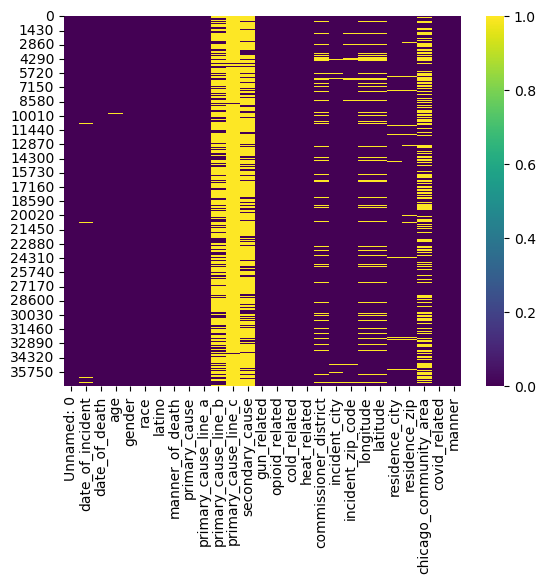

In [105]:
sns.heatmap(semi_clean.isnull(), cmap='viridis');

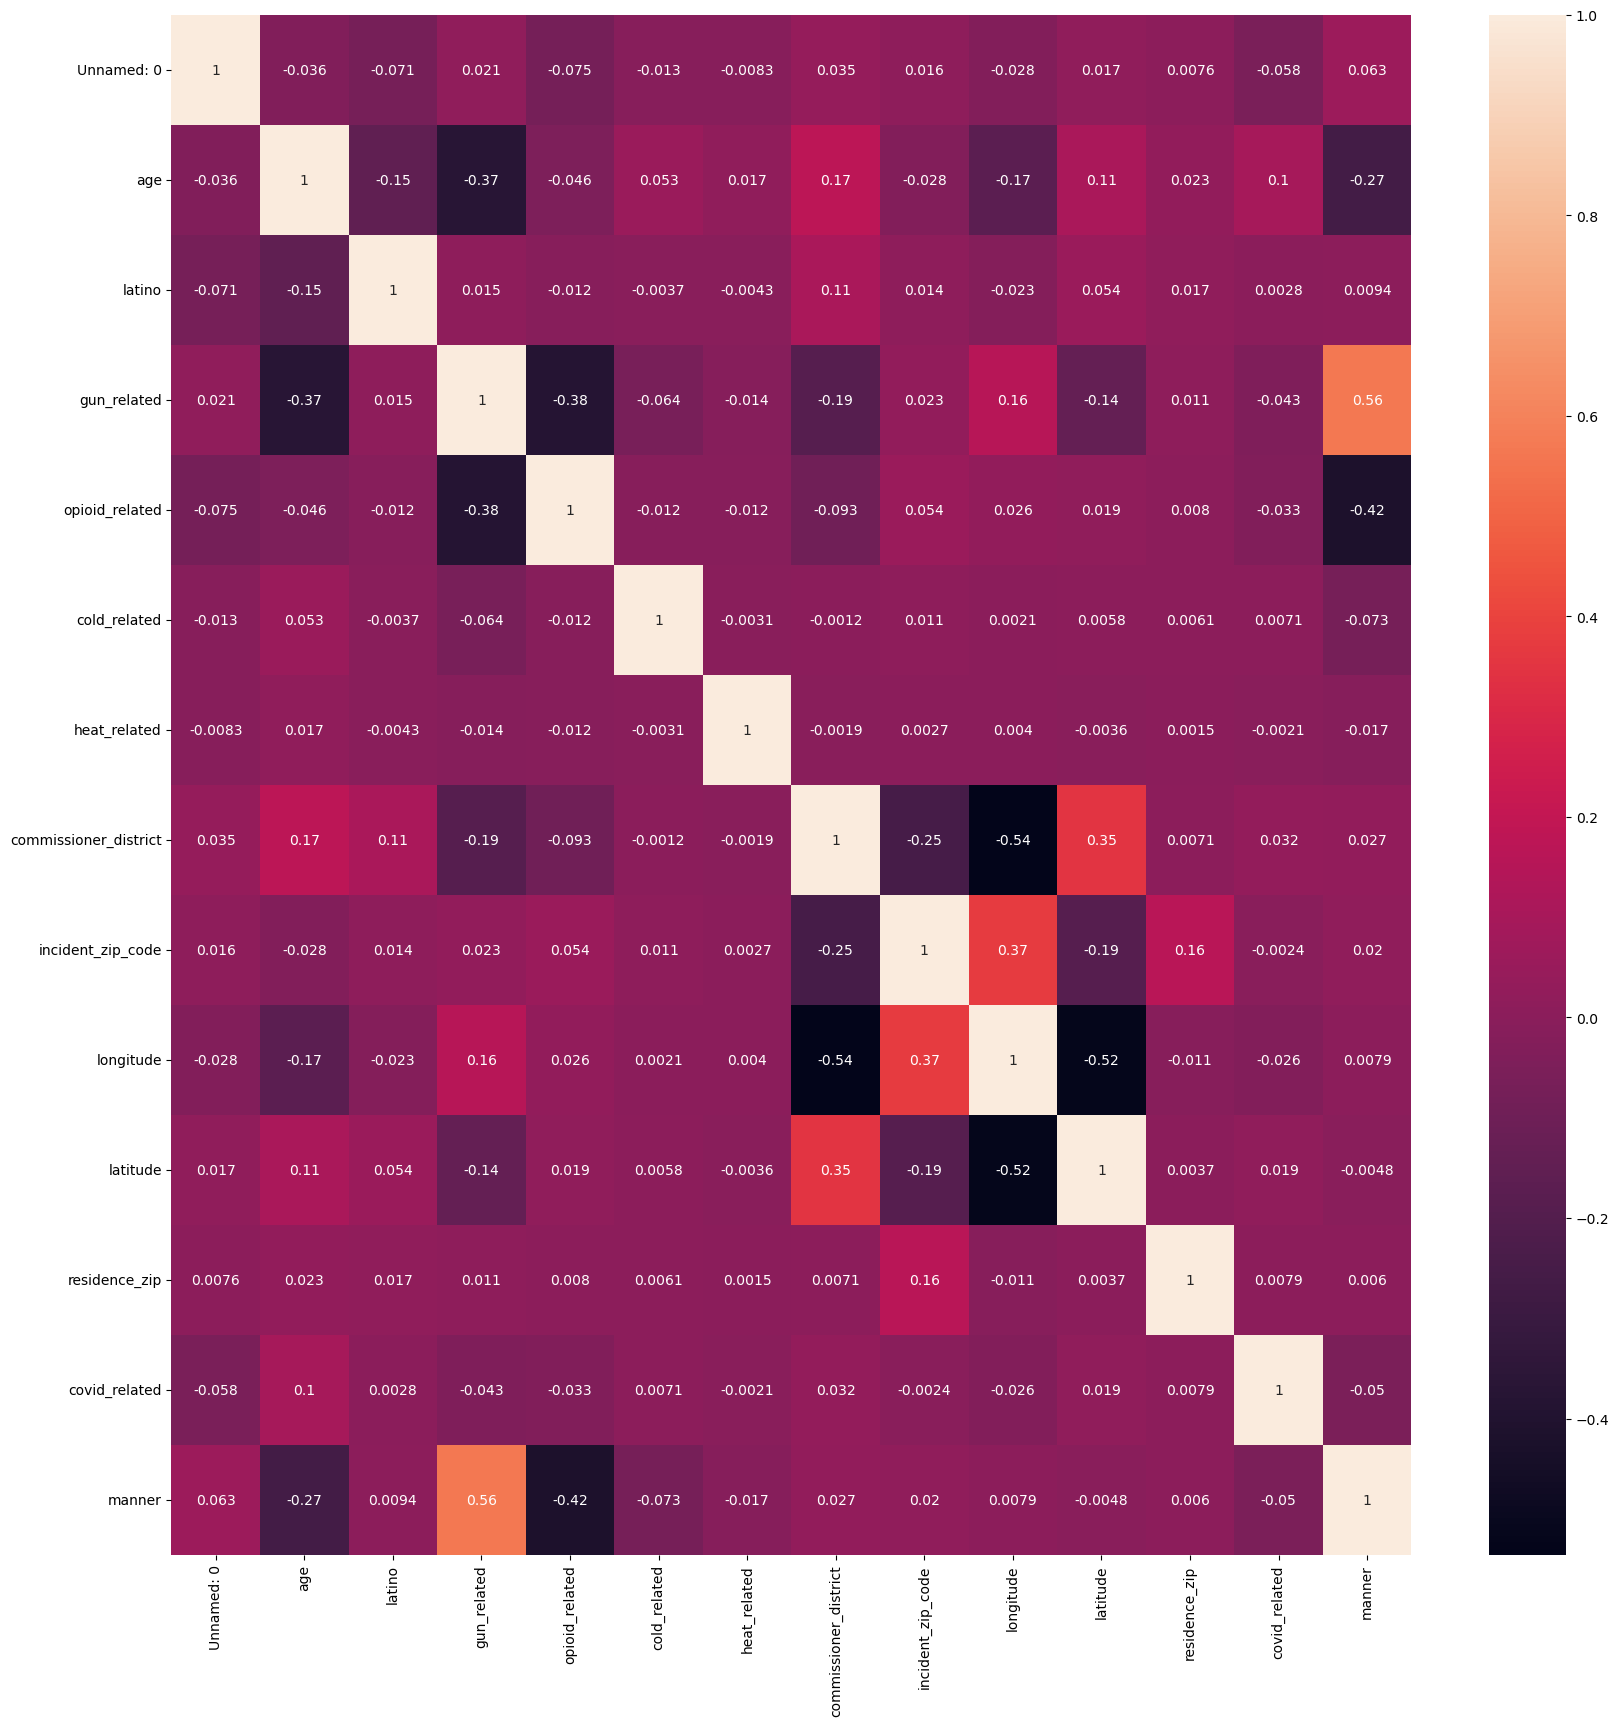

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(semi_clean.corr(numeric_only=True), annot=True);

In [37]:
semi_clean[semi_clean['age'].isna()]

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related
91,351,10/07/2023 10:06:00 AM,10/07/2023 09:45:00 AM,NaN,Female,Black,False,HOMICIDE,GUNSHOT WOUND TO THE CHEST,GUNSHOT WOUND TO THE CHEST,NaN,NaN,NaN,True,False,False,False,3.0,CHICAGO,60620.0,-87.633322,41.748372,NaN,NaN,CHATHAM,False
1416,3025,06/02/2023 02:01:00 PM,06/02/2023 12:50:00 PM,NaN,Male,White,True,ACCIDENT,"COMBINED DRUG (FENTANYL, DESPROPIONYL FENTANYL...","COMBINED DRUG (FENTANYL, DESPROPIONYL FENTANYL...",NaN,NaN,NaN,False,True,False,False,7.0,CHICAGO,60629.0,-87.702089,41.775068,Chicago,60629.0,CHICAGO LAWN,False
2014,4017,04/18/2023 07:34:00 PM,04/18/2023 07:08:00 PM,NaN,Male,NaN,False,ACCIDENT,COCAINE TOXICITY,COCAINE TOXICITY,NaN,NaN,NaN,False,False,False,False,12.0,CHICAGO,60642.0,-87.660264,41.902233,NaN,NaN,WEST TOWN,False
3922,7086,12/01/2022 11:22:00 AM,12/01/2022 11:34:00 AM,NaN,Female,Black,False,ACCIDENT,HYPOTHERMIA. COLD EXPOSURE,HYPOTHERMIA,COLD EXPOSURE,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,False,True,False,2.0,CHICAGO,60604.0,-87.626241,41.879489,NaN,NaN,LOOP,False
6333,10827,06/14/2022 02:30:00 PM,06/14/2022 03:21:00 PM,NaN,Male,White,False,SUICIDE,SHOTGUN WOUND OF HEAD (INTRAORAL),SHOTGUN WOUND OF HEAD (INTRAORAL),NaN,NaN,NaN,True,False,False,False,15.0,STREAMWOOD,60107.0,-88.176774,42.031074,Streamwood,60107.0,NaN,False
7524,12645,03/20/2022 02:47:00 PM,03/20/2022 04:41:00 PM,NaN,Unknown,Unknown,False,HOMICIDE,HOMICIDE BY UNSPECIFIED MEANS,HOMICIDE BY UNSPECIFIED MEANS,NaN,NaN,NaN,False,False,False,False,16.0,BERWYN,60402.0,-87.802092,41.806875,NaN,NaN,NaN,False
8426,15564,01/15/2022 05:05:00 AM,01/15/2022 05:21:00 AM,NaN,Male,Unknown,False,HOMICIDE,ENVIRONMENTAL COLD EXPOSURE. NEGLECT,ENVIRONMENTAL COLD EXPOSURE,NEGLECT,NaN,NaN,False,False,True,False,3.0,CHICAGO,60610.0,-87.637691,41.901905,NaN,NaN,NEAR NORTH SIDE,False
8500,16065,12/07/2021 02:11:00 PM,01/09/2022 11:08:00 AM,NaN,Male,White,True,ACCIDENT,COMPLICATIONS OF MULTIPLE BLUNT FORCE INJURIES...,COMPLICATIONS OF MULTIPLE BLUNT FORCE INJURIES,FALL,NaN,CHRONIC ETHANOL ABUSE,False,False,False,False,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,False
8510,16125,01/08/2022 07:50:00 PM,01/08/2022 11:49:00 PM,NaN,Male,White,False,ACCIDENT,METHAMPHETAMINE TOXICITY,METHAMPHETAMINE TOXICITY,NaN,NaN,NaN,False,False,False,False,13.0,CHICAGO,60626.0,-87.664248,42.003928,Chicago,60626.0,ROGERS PARK,False
8975,18052,12/07/2021 06:05:00 AM,12/07/2021 06:10:00 AM,NaN,Male,White,False,ACCIDENT,ENVIRONMENTAL COLD EXPOSURE,ENVIRONMENTAL COLD EXPOSURE,NaN,NaN,NaN,False,False,False,False,2.0,CHICAGO,60616.0,-87.627031,41.858404,NaN,NaN,NEAR SOUTH SIDE,False


> _Most of the age NaN also has missing info on primary (b and c) and secondary causes, so if we are going to be using that 
info these rows are of no use to us._

>_If we want to keep the NaN rows, what do we replace with? A dummy value? The mean?_

In [38]:
semi_clean.age.mean()

47.04231535850886

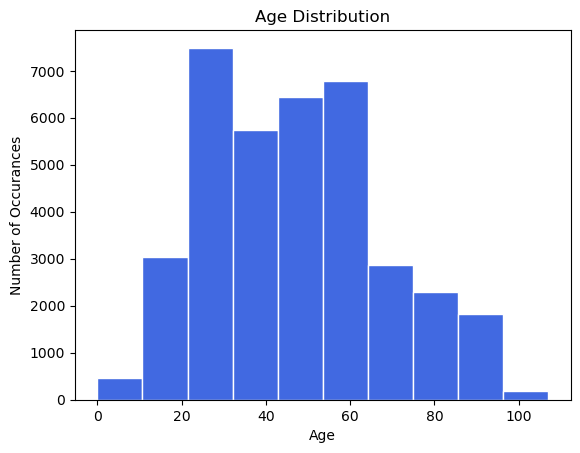

In [56]:
plt.hist(semi_clean.age, bins=10, color='royalblue', edgecolor = 'white')
plt.xlabel('Age')
plt.ylabel('Number of Occurances')
plt.title('Age Distribution');

In [57]:
semi_clean.gender.value_counts()

Male       27997
Female      9154
Unknown        1
Name: gender, dtype: int64

In [58]:
semi_clean[semi_clean['gender'].isna()]

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related
7321,12313,03/31/2022 07:16:00 PM,04/02/2022 12:10:00 PM,0.0,NaN,NaN,False,ACCIDENT,COMPLICATIONS OF PREMATURITY. PLACENTAL ABRUPT...,COMPLICATIONS OF PREMATURITY,PLACENTAL ABRUPTION,MATERNAL TRAUMA,MOTOR VEHICLE COLLISION,False,False,False,False,2.0,CHICAGO,60623.0,-87.717765,41.862832,NaN,NaN,NORTH LAWNDALE,False
11922,23970,05/20/2021 01:07:00 PM,05/23/2021 10:48:00 AM,92.0,NaN,NaN,False,ACCIDENT,CEREBRAL INJURIES. FALL,CEREBRAL INJURIES,FALL,NaN,"HYPERTENSION, CHRONIC KIDNEY DISEASE, CHRONIC ...",False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14609,33577,10/30/2020 05:22:00 PM,10/31/2020 03:01:00 AM,NaN,NaN,NaN,False,HOMICIDE,SHARP FORCE INJURY,SHARP FORCE INJURY,NaN,NaN,NaN,False,False,False,False,5.0,BLUE ISLAND,60406.0,-87.681642,41.662499,NaN,NaN,NaN,False
18019,44514,02/07/2020 08:00:00 AM,02/19/2020 01:20:00 PM,86.0,NaN,White,False,ACCIDENT,BLUNT FORCE INJURIES OF LEFT HIP. UNWITNESSED ...,BLUNT FORCE INJURIES OF LEFT HIP,UNWITNESSED FALL,NaN,HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...,False,False,False,False,13.0,CHICAGO,60645.0,-87.687786,41.998824,Chicago,60645.0,WEST RIDGE,False
18188,44796,02/04/2020 12:00:00 AM,02/04/2020 11:55:00 PM,61.0,NaN,NaN,True,ACCIDENT,CARBON MONOXIDE INTOXICATION. INHALATION OF SM...,CARBON MONOXIDE INTOXICATION,INHALATION OF SMOKE AND SOOT,HOUSE FIRE.,NaN,False,False,False,False,16.0,CICERO,60804.0,-87.743912,41.865203,Cicero,60804.0,NaN,False
35709,75247,02/24/2015 09:37:00 PM,02/24/2015 10:00:00 PM,NaN,NaN,NaN,False,ACCIDENT,THERMAL INJURIES AND INHALATION OF PRODUCTS OF...,THERMAL INJURIES AND INHALATION OF PRODUCTS OF...,HOUSE FIRE.,NaN,NaN,False,False,False,False,NaN,CHICAGO,60644.0,NaN,NaN,Chicago,60644.0,NaN,False


> _Unknown is already a category, so we can map the NaN to unknown_

In [59]:
semi_clean.race.value_counts()

White         19284
Black         16704
Asian           667
Other           362
Unknown          60
Am. Indian       32
Name: race, dtype: int64

In [60]:
semi_clean[semi_clean['race'].isna()]

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related
1055,2460,06/12/2023 08:58:00 PM,06/27/2023 08:07:00 PM,72.0,Male,NaN,False,ACCIDENT,FRACTURE OF PELVIS. FALL,FRACTURE OF PELVIS,FALL,NaN,"ORGANIC CARDIOVASCULAR DISEASE, END-STAGE RENA...",False,False,False,False,2.0,CHICAGO,60612.0,-87.697180,41.876058,Chicago,60612.0,EAST GARFIELD PARK,False
1186,2654,05/07/2023 05:21:00 PM,06/17/2023 06:44:00 PM,63.0,Male,NaN,False,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,NaN,NaN,False,False,False,False,4.0,CHICAGO,60617.0,-87.584750,41.733033,Chicago,60629.0,CALUMET HEIGHTS,False
2014,4017,04/18/2023 07:34:00 PM,04/18/2023 07:08:00 PM,NaN,Male,NaN,False,ACCIDENT,COCAINE TOXICITY,COCAINE TOXICITY,NaN,NaN,NaN,False,False,False,False,12.0,CHICAGO,60642.0,-87.660264,41.902233,NaN,NaN,WEST TOWN,False
2446,4731,03/13/2023 12:00:00 AM,03/15/2023 09:38:00 AM,81.0,Male,NaN,False,ACCIDENT,CLOSED HEAD INJURIES. FALL,CLOSED HEAD INJURIES,FALL,NaN,NaN,False,False,False,False,NaN,CHICAGO,60631.0,NaN,NaN,Chicago,60631.0,NaN,False
5423,9394,08/18/2022 11:37:00 AM,08/18/2022 11:54:00 AM,80.0,Male,NaN,False,SUICIDE,INTRAORAL GUNSHOT WOUND OF HEAD,INTRAORAL GUNSHOT WOUND OF HEAD,NaN,NaN,NaN,True,False,False,False,17.0,WESTCHESTER,60154.0,-87.895505,41.836982,Westchester,60154.0,NaN,False
6296,10775,05/31/2022 04:17:00 PM,06/09/2022 09:06:00 PM,82.0,Male,NaN,False,ACCIDENT,COMPLICATIONS OF FALL,COMPLICATIONS OF FALL,NaN,NaN,ATRIAL FIBRILLATION; HYPERTENSIVE AND ARTERIOS...,False,False,False,False,10.0,CHICAGO,60640.0,-87.676967,41.963394,Chicago,60640.0,LINCOLN SQUARE,False
7321,12313,03/31/2022 07:16:00 PM,04/02/2022 12:10:00 PM,0.0,NaN,NaN,False,ACCIDENT,COMPLICATIONS OF PREMATURITY. PLACENTAL ABRUPT...,COMPLICATIONS OF PREMATURITY,PLACENTAL ABRUPTION,MATERNAL TRAUMA,MOTOR VEHICLE COLLISION,False,False,False,False,2.0,CHICAGO,60623.0,-87.717765,41.862832,NaN,NaN,NORTH LAWNDALE,False
8658,16914,12/30/2021 09:21:00 AM,12/30/2021 09:31:00 AM,44.0,Male,NaN,False,ACCIDENT,MULTIPLE INJURIES. COMPRESSION BY SHIPPING CON...,MULTIPLE INJURIES,COMPRESSION BY SHIPPING CONTAINER,NaN,"COMBINED DRUG (FENTANYL, METHAMPHETAMINE, AMPH...",False,True,False,False,17.0,HODGKINS,60525.0,-87.869765,41.750889,Tonalea,86044.0,NaN,False
9098,18391,11/28/2021 07:47:00 AM,11/28/2021 08:00:00 AM,25.0,Female,NaN,False,ACCIDENT,COMBINED DRUG (COCAINE AND FENTANYL) TOXICITY,COMBINED DRUG (COCAINE AND FENTANYL) TOXICITY,NaN,NaN,NaN,False,True,False,False,5.0,MARKHAM,60428.0,-87.668960,41.603188,Markham,60428.0,NaN,False
10015,20408,09/26/2021 02:33:00 AM,09/26/2021 03:30:00 AM,43.0,Male,NaN,False,ACCIDENT,MULTIPLE INJURIES. MOTOR VEHICLE CRASH,MULTIPLE INJURIES,MOTOR VEHICLE CRASH,NaN,NaN,False,False,False,False,NaN,SUMMIT,60501.0,NaN,NaN,Chicago,60624.0,NaN,False


> _Unknown is already a category, so we can map the NaN to unknown_

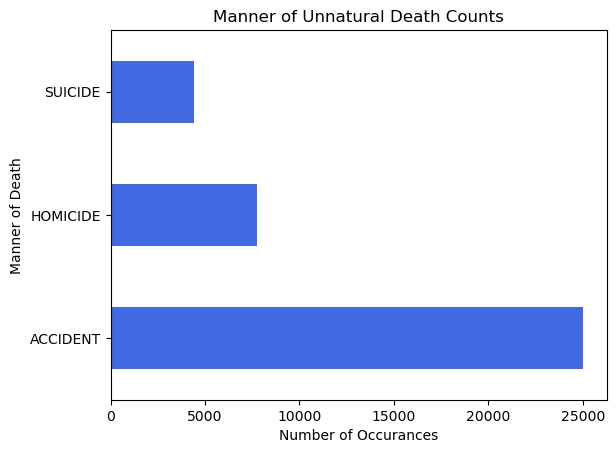

In [71]:
semi_clean.manner_of_death.value_counts().plot(kind = 'barh', color='royalblue')
plt.xlabel('Number of Occurances')
plt.ylabel('Manner of Death')
plt.title('Manner of Unnatural Death Counts');

In [84]:
semi_clean['manner'] = semi_clean['manner_of_death'].map({
    'ACCIDENT':0,
    'HOMICIDE':1,
    'SUICIDE':2,
})

semi_clean.head()

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,manner
0,20,10/24/2023 12:43:00 AM,10/25/2023 12:11:00 AM,22.0,Female,Black,False,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,NaN,NaN,False,False,False,False,1.0,CHICAGO,60644.0,-87.754890,41.872093,Indianapolis,46224.0,AUSTIN,False,0
1,22,10/24/2023 10:30:00 PM,10/24/2023 09:51:00 PM,35.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,4.0,CHICAGO,60649.0,-87.558292,41.759939,Chicago,60633.0,SOUTH SHORE,False,1
2,23,10/24/2023 09:18:00 PM,10/24/2023 08:36:00 PM,54.0,Male,White,False,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,NaN,NaN,NaN,True,False,False,False,12.0,CHICAGO,60634.0,-87.780811,41.955351,Chicago,60634.0,PORTAGE PARK,False,2
3,30,10/24/2023 07:48:00 AM,10/24/2023 07:16:00 AM,19.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,3.0,CHICAGO,60649.0,-87.584359,41.771935,NaN,NaN,SOUTH SHORE,False,1
4,35,10/23/2023 10:21:00 PM,10/23/2023 09:29:00 PM,41.0,Male,Black,False,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,NaN,NaN,NaN,True,False,False,False,2.0,CHICAGO,60636.0,-87.663792,41.782286,Chicago,60636.0,WEST ENGLEWOOD,False,1


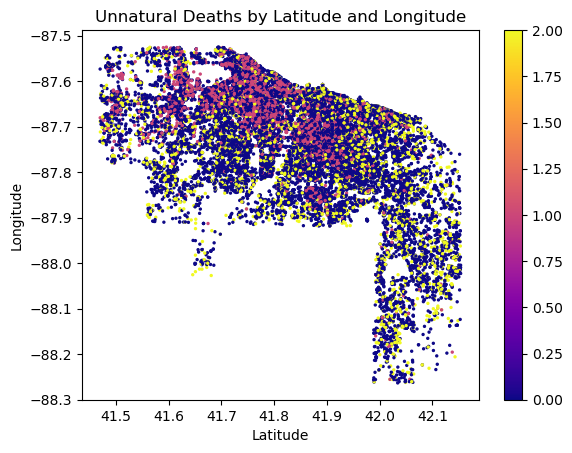

In [89]:
plt.scatter(semi_clean['latitude'], semi_clean['longitude'], s=2, c=semi_clean['manner'], cmap='plasma')
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Unnatural Deaths by Latitude and Longitude');


#     'ACCIDENT':0,
#     'HOMICIDE':1,
#     'SUICIDE':2,

>_Homicides seem to be clustered in one general area_ 

>_A note: 5077 lats and longs are missing_

In [94]:
1 - (5077/37158)

0.8633672425857151

In [77]:
# semi_clean[semi_clean['commissioner_district'].isna()]

In [76]:
semi_clean['commissioner_district'].isna().sum()

5078

>_Most of the cities and city zips were not NaN. We can match the zips with filled in commish dist info and map. (Same with lats and longs?)_

>_zip codes are floats? we want them to be objects?_ 

In [106]:
semi_clean.head(1)

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,manner
0,20,10/24/2023 12:43:00 AM,10/25/2023 12:11:00 AM,22.0,Female,Black,False,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,NaN,NaN,False,False,False,False,1.0,CHICAGO,60644.0,-87.75489,41.872093,Indianapolis,46224.0,AUSTIN,False,0


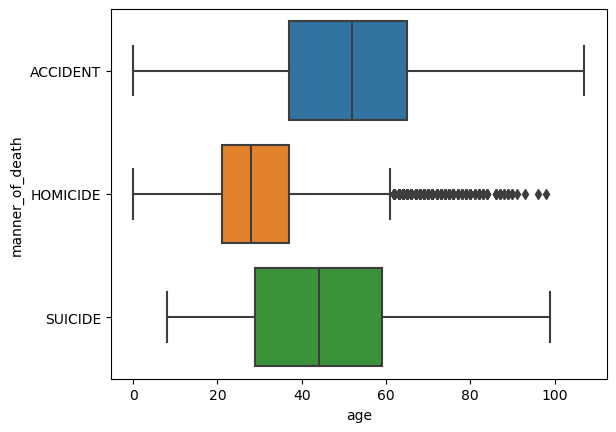

In [107]:
sns.boxplot(x = semi_clean.age, y = semi_clean.manner_of_death);

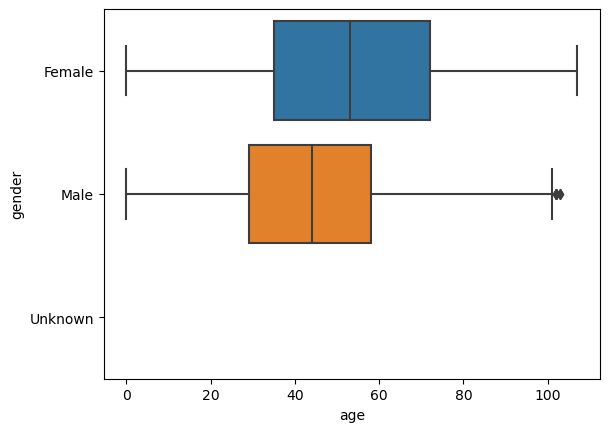

In [112]:
sns.boxplot(x = semi_clean.age, y = semi_clean.gender);

In [113]:
semi_clean[semi_clean['date_of_death'].isna()]

,Unnamed: 0,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,manner
31775,67765,03/26/2016 09:07:00 AM,NaN,70.0,Female,White,False,ACCIDENT,COMPLICATIONS OF SUBDURAL HEMATOMA . DUE TO FA...,COMPLICATIONS OF SUBDURAL HEMATOMA,DUE TO FALL DOWNSTAIRS,NaN,NaN,False,False,False,False,17.0,LA GRANGE PARK,60526.0,-87.867411,41.836726,La Grange Park,60526.0,NaN,False,0
